In [1]:
import os
import zipfile
import shutil
import fnmatch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the paths to the zip files and directories to extract to
zip_paths = ['Dataset_Train.zip','Dataset_Test.zip', 'Dataset_Validation.zip']
extract_dirs = ['Dataset/Dataset_Train', 'Dataset/Dataset_Test', 'Dataset/Dataset_Validation']

# Loop through each zip file and extract its contents to the corresponding directory
for i in range(len(zip_paths)):
    with zipfile.ZipFile(zip_paths[i], 'r') as zip_ref:
        zip_ref.extractall(extract_dirs[i])

In [ ]:
source_dir = 'Dataset/Dataset_Train' # change this to the directory you want to rename files in
dest_dir = 'Dataset/Dataset_Train_Extracted' # change this to the directory you want to move the renamed files to

# Loop through all files in the source directory and its subdirectories
for root, dirs, files in os.walk(source_dir):
    for file_name in files:
        # Check if the file name contains "._" using fnmatch.fnmatch()
        if fnmatch.fnmatch(file_name, '*._*'):
            print(os.path.join(root, file_name))

In [ ]:
#  copies files from directories starting with "Class 1", "Class 2", "Class 3" (or) "1", "2", "3" and pastes them into a destination directory with folder names "Class 1", "Class 2", "Class 3", respectively, where those folders are in different subdirectories

for root, dirs, files in os.walk(source_dir):
    for dir_name in dirs:
        if dir_name.startswith(('Class 1', '1', 'Class 2', '2', 'Class 3', '3')):
            files_path = os.path.join(root, dir_name)
            for file_name in os.listdir(files_path):
                if not file_name.startswith('.'):
                    old_file_path = os.path.join(files_path, file_name)
                    new_file_name = "Train_" + file_name  # Change "prefix_" to the desired prefix
                    new_file_path = os.path.join(files_path, new_file_name)
                    os.rename(old_file_path, new_file_path)

for root, dirs, files in os.walk(source_dir):
    for dir_name in dirs:
        if dir_name.startswith(('Class 1', '1')):
            class_dir = os.path.join(dest_dir, 'Class 1')
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)
            files_path = os.path.join(root, dir_name)
            for file_name in os.listdir(files_path):
                if file_name.endswith(('.jpg', '.png', '.jpeg', '.JPG', '.PNG', '.JPEG')):
                    shutil.copy(os.path.join(files_path, file_name), class_dir)
        elif dir_name.startswith(('Class 2', '2')):
            class_dir = os.path.join(dest_dir, 'Class 2')
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)
            files_path = os.path.join(root, dir_name)
            for file_name in os.listdir(files_path):
                if file_name.endswith(('.jpg', '.png', '.jpeg', '.JPG', '.PNG', '.JPEG')):
                    shutil.copy(os.path.join(files_path, file_name), class_dir)
        elif dir_name.startswith(('Class 3', '3')):
            class_dir = os.path.join(dest_dir, 'Class 3')
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)
            files_path = os.path.join(root, dir_name)
            for file_name in os.listdir(files_path):
                if file_name.endswith(('.jpg', '.png', '.jpeg', '.JPG', '.PNG', '.JPEG')):
                    shutil.copy(os.path.join(files_path, file_name), class_dir)

In [3]:
!unzip /content/drive/MyDrive/Extracted_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset_Train_Extracted/Class 3/xx (20).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (200).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (201).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (202).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (203).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (204).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (205).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (206).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (207).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (208).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (209).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (21).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (210).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (211).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (212).jpg  
  inflating: Dataset_Train_Extracted/Class 3/xx (21

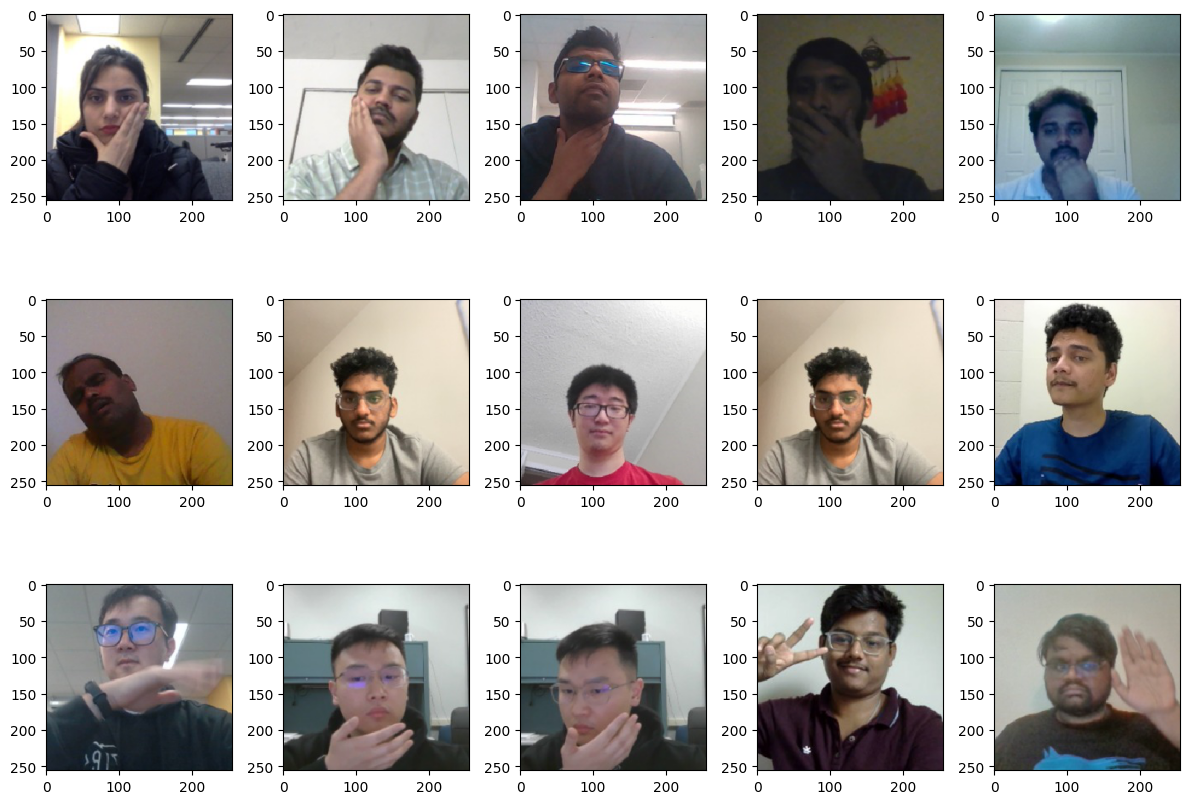

In [4]:
# display some images for every different Class

import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 256

# input path for the images
base_path = "/content/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "Dataset_Train_Extracted/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "Dataset_Train_Extracted/" + expression + "/" +os.listdir(base_path + "Dataset_Train_Extracted/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [5]:
# count number of train images for each Class

for expression in os.listdir(base_path + "Dataset_Train_Extracted"):
    print(str(len(os.listdir(base_path + "Dataset_Train_Extracted/" + expression))) + " " + expression + " images")

10546 Class 1 images
10431 Class 2 images
10505 Class 3 images


In [6]:
# count number of test images for each Class

for expression in os.listdir(base_path + "Dataset_Test_Extracted"):
    print(str(len(os.listdir(base_path + "Dataset_Test_Extracted/" + expression))) + " " + expression + " images")

3496 Class 1 images
3529 Class 2 images
3721 Class 3 images


In [7]:
# count number of validation images for each Class

for expression in os.listdir(base_path + "Dataset_Validation_Extracted"):
    print(str(len(os.listdir(base_path + "Dataset_Validation_Extracted/" + expression))) + " " + expression + " images")

1597 Class 1 images
1585 Class 2 images
1619 Class 3 images


In [8]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 64

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

pic_size = 48

train_generator = datagen_train.flow_from_directory(base_path + "Dataset_Train_Extracted",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "Dataset_Validation_Extracted",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 31482 images belonging to 3 classes.
Found 4801 images belonging to 3 classes.


In [9]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
print(train_generator.image_shape)
print(validation_generator.image_shape)

(48, 48, 1)
(48, 48, 1)


In [11]:
%%time

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
491/491 [==============================] - ETA: 0s - loss: 1.0134 - accuracy: 0.5211

491/491 [==============================] - 65s 104ms/step - loss: 1.0134 - accuracy: 0.5211 - val_loss: 1.4263 - val_accuracy: 0.3454
Epoch 2/50
491/491 [==============================] - ETA: 0s - loss: 0.5275 - accuracy: 0.7814

491/491 [==============================] - 48s 97ms/step - loss: 0.5275 - accuracy: 0.7814 - val_loss: 1.8347 - val_accuracy: 0.5487
Epoch 3/50
491/491 [==============================] - ETA: 0s - loss: 0.2713 - accuracy: 0.8971

491/491 [==============================] - 53s 107ms/step - loss: 0.2713 - accuracy: 0.8971 - val_loss: 2.4346 - val_accuracy: 0.4827
Epoch 4/50
491/491 [==============================] - ETA: 0s - loss: 0.1653 - accuracy: 0.9410

491/491 [==============================] - 49s 99ms/step - loss: 0.1653 - accuracy: 0.9410 - val_loss: 2.9192 - val_accuracy: 0.3963
Epoch 5/50
491/491 [==============================] - ETA: 0s - loss: 0.1109 - accuracy: 0.9612

491/491 [==============================] - 49s 99ms/step - loss: 0.1109 - accuracy: 0.9612 - val_loss: 3.3009 - val_accuracy: 0.4342
Epoch 6/50
491/491 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9722

491/491 [==============================] - 48s 97ms/step - loss: 0.0788 - accuracy: 0.9722 - val_loss: 3.9683 - val_accuracy: 0.4108
Epoch 7/50
491/491 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9790

491/491 [==============================] - 49s 100ms/step - loss: 0.0593 - accuracy: 0.9790 - val_loss: 4.1745 - val_accuracy: 0.3981
Epoch 8/50
491/491 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9849

491/491 [==============================] - 48s 97ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 3.5965 - val_accuracy: 0.3854
Epoch 9/50
491/491 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9862

491/491 [==============================] - 53s 108ms/step - loss: 0.0409 - accuracy: 0.9862 - val_loss: 3.5404 - val_accuracy: 0.4090
Epoch 10/50
491/491 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9902

491/491 [==============================] - 49s 99ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 3.8967 - val_accuracy: 0.4288
Epoch 11/50
491/491 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9912

491/491 [==============================] - 48s 97ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 4.2386 - val_accuracy: 0.3642
Epoch 12/50
491/491 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9929

491/491 [==============================] - 48s 97ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 4.1310 - val_accuracy: 0.3688
Epoch 13/50
491/491 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9926

491/491 [==============================] - 53s 108ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 3.9697 - val_accuracy: 0.4469
Epoch 14/50
491/491 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9924

491/491 [==============================] - 53s 108ms/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 4.0123 - val_accuracy: 0.3731
Epoch 15/50
491/491 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9942

491/491 [==============================] - 48s 97ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 4.6849 - val_accuracy: 0.3733
Epoch 16/50
491/491 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9950

491/491 [==============================] - 53s 108ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 4.4162 - val_accuracy: 0.3810
Epoch 17/50
491/491 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9956

491/491 [==============================] - 53s 108ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 5.2439 - val_accuracy: 0.3627
Epoch 18/50
491/491 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9958

491/491 [==============================] - 48s 97ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 4.2334 - val_accuracy: 0.4421
Epoch 19/50
491/491 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9957

491/491 [==============================] - 53s 107ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 3.7860 - val_accuracy: 0.4602
Epoch 20/50
491/491 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9966

491/491 [==============================] - 53s 108ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 4.3203 - val_accuracy: 0.4756
Epoch 21/50
491/491 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9969

491/491 [==============================] - 48s 97ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 4.6280 - val_accuracy: 0.4127
Epoch 22/50
491/491 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9973

491/491 [==============================] - 49s 100ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 3.4774 - val_accuracy: 0.4396
Epoch 23/50
491/491 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9974

491/491 [==============================] - 48s 97ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 5.3717 - val_accuracy: 0.3613
Epoch 24/50
491/491 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967

491/491 [==============================] - 53s 107ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 4.4284 - val_accuracy: 0.4467
Epoch 25/50
491/491 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9980

491/491 [==============================] - 47s 96ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 4.1067 - val_accuracy: 0.4142
Epoch 26/50
491/491 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9979

491/491 [==============================] - 52s 107ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 4.5477 - val_accuracy: 0.4221
Epoch 27/50
491/491 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9982

491/491 [==============================] - 49s 99ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 4.1794 - val_accuracy: 0.3827
Epoch 28/50
491/491 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9972

491/491 [==============================] - 48s 97ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 3.6844 - val_accuracy: 0.3781
Epoch 29/50
491/491 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981

491/491 [==============================] - 53s 108ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 4.6214 - val_accuracy: 0.4429
Epoch 30/50
491/491 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9982

491/491 [==============================] - 48s 97ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 4.2562 - val_accuracy: 0.3904
Epoch 31/50
491/491 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9987

491/491 [==============================] - 53s 108ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 4.4009 - val_accuracy: 0.3981
Epoch 32/50
491/491 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

491/491 [==============================] - 49s 99ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 5.3787 - val_accuracy: 0.3494
Epoch 33/50
491/491 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9982

491/491 [==============================] - 54s 109ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 4.0206 - val_accuracy: 0.4296
Epoch 34/50
491/491 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9975

491/491 [==============================] - 53s 109ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 4.4760 - val_accuracy: 0.4171
Epoch 35/50
491/491 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9983

491/491 [==============================] - 47s 96ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 4.5624 - val_accuracy: 0.4821
Epoch 36/50
491/491 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992

491/491 [==============================] - 53s 107ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 4.1374 - val_accuracy: 0.4119
Epoch 37/50
491/491 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9979

491/491 [==============================] - 47s 96ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 4.6777 - val_accuracy: 0.3600
Epoch 38/50
491/491 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989

491/491 [==============================] - 53s 108ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 5.0432 - val_accuracy: 0.3665
Epoch 39/50
491/491 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9990

491/491 [==============================] - 52s 107ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 5.7610 - val_accuracy: 0.4275
Epoch 40/50
491/491 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9991

491/491 [==============================] - 49s 100ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 4.4532 - val_accuracy: 0.4385
Epoch 41/50
491/491 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983

491/491 [==============================] - 47s 95ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 5.4494 - val_accuracy: 0.3383
Epoch 42/50
491/491 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9987

491/491 [==============================] - 52s 106ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 4.4958 - val_accuracy: 0.3875
Epoch 43/50
491/491 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9995

491/491 [==============================] - 48s 98ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 5.0625 - val_accuracy: 0.4023
Epoch 44/50
491/491 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993

491/491 [==============================] - 53s 108ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 4.5195 - val_accuracy: 0.4298
Epoch 45/50
491/491 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987

491/491 [==============================] - 51s 103ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 5.0911 - val_accuracy: 0.3750
Epoch 46/50
491/491 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988

491/491 [==============================] - 48s 97ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 4.9059 - val_accuracy: 0.4169
Epoch 47/50
491/491 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993

491/491 [==============================] - 48s 98ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 4.6421 - val_accuracy: 0.3950
Epoch 48/50
491/491 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9991

491/491 [==============================] - 49s 99ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 5.8194 - val_accuracy: 0.4060
Epoch 49/50
491/491 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989

491/491 [==============================] - 55s 111ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 5.4858 - val_accuracy: 0.3569
Epoch 50/50
491/491 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995

491/491 [==============================] - 52s 107ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 5.4847 - val_accuracy: 0.3652
CPU times: user 46min 52s, sys: 1min 18s, total: 48min 10s
Wall time: 55min 37s


In [12]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

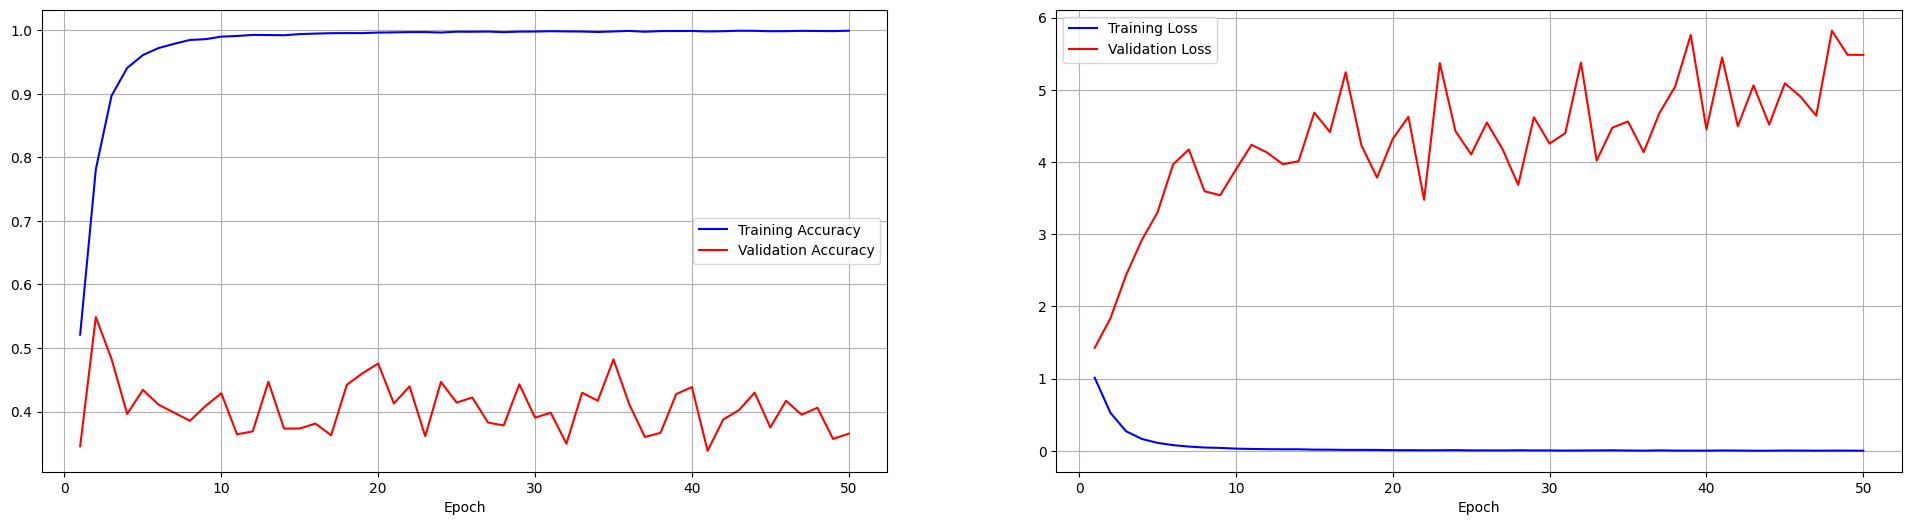

Best Validation Accuracy Score 0.54875, is for epoch 2


In [13]:
plot_results(history)
best_epoch =get_best_epcoh(history)

In [14]:
# Load the test data

datagen_test = ImageDataGenerator()

test_generator = datagen_test.flow_from_directory(base_path + "Dataset_Test_Extracted",
    target_size=(pic_size, pic_size),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Found 10746 images belonging to 3 classes.
168/168 [==============================] - 13s 79ms/step - loss: 3.8039 - accuracy: 0.5018
Test loss: 3.8039064407348633
Test accuracy: 0.5017681121826172


<ipython-input-15-225d16c8ca7d>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=validation_generator)


<Figure size 640x480 with 0 Axes>

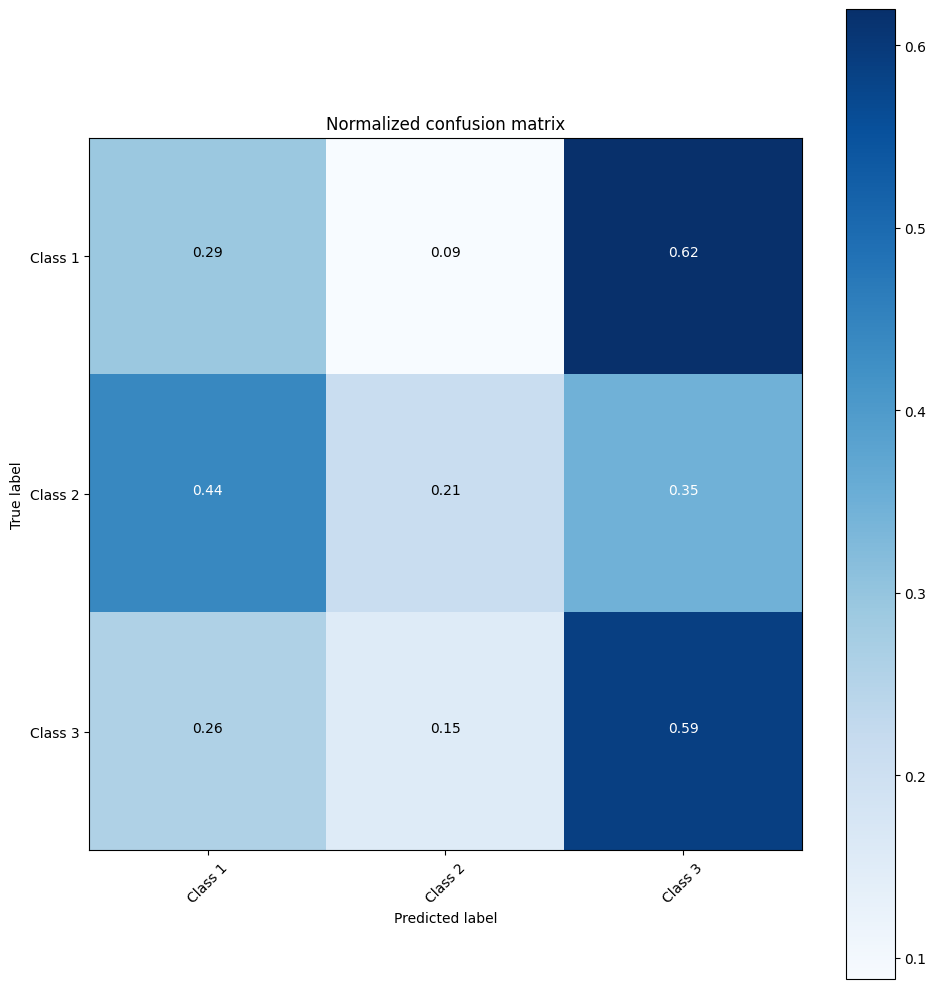

In [15]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

pic_size = 48

train_generator = datagen_train.flow_from_directory(base_path + "Dataset_Train_Extracted",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_test = ImageDataGenerator()

test_generator = datagen_test.flow_from_directory(base_path + "Dataset_Test_Extracted",
    target_size=(pic_size, pic_size),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False)



Found 31482 images belonging to 3 classes.
Found 10746 images belonging to 3 classes.


In [17]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 3

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
%%time

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = test_generator,
                                validation_steps = test_generator.n//test_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


<timed exec>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


245/245 [==============================] - ETA: 0s - loss: 1.0778 - accuracy: 0.4863

245/245 [==============================] - 66s 260ms/step - loss: 1.0778 - accuracy: 0.4863 - val_loss: 1.2562 - val_accuracy: 0.3696
Epoch 2/50
245/245 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.7152

245/245 [==============================] - 62s 251ms/step - loss: 0.6543 - accuracy: 0.7152 - val_loss: 1.7656 - val_accuracy: 0.3962
Epoch 3/50
245/245 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.8474

245/245 [==============================] - 62s 252ms/step - loss: 0.3826 - accuracy: 0.8474 - val_loss: 2.1690 - val_accuracy: 0.4146
Epoch 4/50
245/245 [==============================] - ETA: 0s - loss: 0.2358 - accuracy: 0.9117

245/245 [==============================] - 53s 217ms/step - loss: 0.2358 - accuracy: 0.9117 - val_loss: 2.4497 - val_accuracy: 0.4289
Epoch 5/50
245/245 [==============================] - ETA: 0s - loss: 0.1543 - accuracy: 0.9448

245/245 [==============================] - 61s 250ms/step - loss: 0.1543 - accuracy: 0.9448 - val_loss: 2.9659 - val_accuracy: 0.4495
Epoch 6/50
245/245 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9617

245/245 [==============================] - 61s 249ms/step - loss: 0.1115 - accuracy: 0.9617 - val_loss: 3.2478 - val_accuracy: 0.4179
Epoch 7/50
245/245 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9715

245/245 [==============================] - 61s 249ms/step - loss: 0.0846 - accuracy: 0.9715 - val_loss: 3.2526 - val_accuracy: 0.4350
Epoch 8/50
245/245 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9778

245/245 [==============================] - 53s 215ms/step - loss: 0.0643 - accuracy: 0.9778 - val_loss: 3.6627 - val_accuracy: 0.4256
Epoch 9/50
245/245 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9833

245/245 [==============================] - 61s 247ms/step - loss: 0.0496 - accuracy: 0.9833 - val_loss: 3.6131 - val_accuracy: 0.4206
Epoch 10/50
245/245 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9853

245/245 [==============================] - 61s 249ms/step - loss: 0.0439 - accuracy: 0.9853 - val_loss: 3.3602 - val_accuracy: 0.4319
Epoch 11/50
245/245 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9878

245/245 [==============================] - 53s 217ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 3.2495 - val_accuracy: 0.4519
Epoch 12/50
245/245 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9901

245/245 [==============================] - 53s 218ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 3.7939 - val_accuracy: 0.4433
Epoch 13/50
245/245 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 0.9901

245/245 [==============================] - 61s 250ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 3.5342 - val_accuracy: 0.4701
Epoch 14/50
245/245 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9921

245/245 [==============================] - 61s 248ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 3.9811 - val_accuracy: 0.4290
Epoch 15/50
245/245 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9938

245/245 [==============================] - 61s 251ms/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 4.1083 - val_accuracy: 0.4387
Epoch 16/50
245/245 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9938

245/245 [==============================] - 53s 218ms/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 3.3682 - val_accuracy: 0.4779
Epoch 17/50
245/245 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 0.9951

245/245 [==============================] - 53s 217ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 3.8152 - val_accuracy: 0.4457
Epoch 18/50
245/245 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9952

245/245 [==============================] - 61s 251ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 3.3643 - val_accuracy: 0.4779
Epoch 19/50
245/245 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9957

245/245 [==============================] - 61s 251ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 3.7596 - val_accuracy: 0.4684
Epoch 20/50
245/245 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9958

245/245 [==============================] - 53s 218ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 3.3124 - val_accuracy: 0.4666
Epoch 21/50
245/245 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9961

245/245 [==============================] - 53s 215ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 3.5846 - val_accuracy: 0.4518
Epoch 22/50
245/245 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964

245/245 [==============================] - 53s 215ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 3.3554 - val_accuracy: 0.4943
Epoch 23/50
245/245 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9968

245/245 [==============================] - 62s 251ms/step - loss: 0.0103 - accuracy: 0.9968 - val_loss: 2.9244 - val_accuracy: 0.4902
Epoch 24/50
245/245 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9971

245/245 [==============================] - 53s 217ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 3.4580 - val_accuracy: 0.4712
Epoch 25/50
245/245 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9974

245/245 [==============================] - 53s 218ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 3.1028 - val_accuracy: 0.4516
Epoch 26/50
245/245 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9966

245/245 [==============================] - 61s 251ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 3.0520 - val_accuracy: 0.4813
Epoch 27/50
245/245 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9978

245/245 [==============================] - 61s 250ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 3.7422 - val_accuracy: 0.4355
Epoch 28/50
245/245 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9971

245/245 [==============================] - 61s 249ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 3.8259 - val_accuracy: 0.5032
Epoch 29/50
245/245 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9977

245/245 [==============================] - 53s 217ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 3.3581 - val_accuracy: 0.5013
Epoch 30/50
245/245 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9979

245/245 [==============================] - 53s 217ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 3.4943 - val_accuracy: 0.4579
Epoch 31/50
245/245 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9985

245/245 [==============================] - 53s 218ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 3.7054 - val_accuracy: 0.4737
Epoch 32/50
245/245 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9981

245/245 [==============================] - 53s 215ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 3.5115 - val_accuracy: 0.4640
Epoch 33/50
245/245 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9977

245/245 [==============================] - 61s 250ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 4.9707 - val_accuracy: 0.4509
Epoch 34/50
245/245 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9981

245/245 [==============================] - 61s 249ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 4.4160 - val_accuracy: 0.4627
Epoch 35/50
245/245 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983

245/245 [==============================] - 61s 250ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 4.3831 - val_accuracy: 0.4569
Epoch 36/50
245/245 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9980

245/245 [==============================] - 61s 250ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 3.5590 - val_accuracy: 0.4675
Epoch 37/50
245/245 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

245/245 [==============================] - 61s 251ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 4.1837 - val_accuracy: 0.4512
Epoch 38/50
245/245 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9987

245/245 [==============================] - 61s 249ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 4.0380 - val_accuracy: 0.4713
Epoch 39/50
245/245 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9979

245/245 [==============================] - 61s 250ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 4.4998 - val_accuracy: 0.4452
Epoch 40/50
245/245 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9981

245/245 [==============================] - 61s 248ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 4.0553 - val_accuracy: 0.4476
Epoch 41/50
245/245 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990

245/245 [==============================] - 53s 217ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 3.4011 - val_accuracy: 0.4767
Epoch 42/50
245/245 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992

245/245 [==============================] - 53s 218ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 3.3060 - val_accuracy: 0.4918
Epoch 43/50
245/245 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9993

245/245 [==============================] - 61s 249ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 3.8653 - val_accuracy: 0.4658
Epoch 44/50
245/245 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989

245/245 [==============================] - 61s 250ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 3.8444 - val_accuracy: 0.4496
Epoch 45/50
245/245 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9988

245/245 [==============================] - 54s 219ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 3.6709 - val_accuracy: 0.4469
Epoch 46/50
245/245 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989

245/245 [==============================] - 61s 250ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 3.3525 - val_accuracy: 0.4901
Epoch 47/50
245/245 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9982

245/245 [==============================] - 61s 250ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 3.6297 - val_accuracy: 0.4601
Epoch 48/50
245/245 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9988

245/245 [==============================] - 53s 216ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 3.9916 - val_accuracy: 0.4643
Epoch 49/50
245/245 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9991

245/245 [==============================] - 53s 217ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 3.7171 - val_accuracy: 0.4528
Epoch 50/50
245/245 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991

245/245 [==============================] - 61s 251ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 3.4419 - val_accuracy: 0.4780
CPU times: user 49min 43s, sys: 1min 15s, total: 50min 59s
Wall time: 57min 55s


In [19]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Test Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

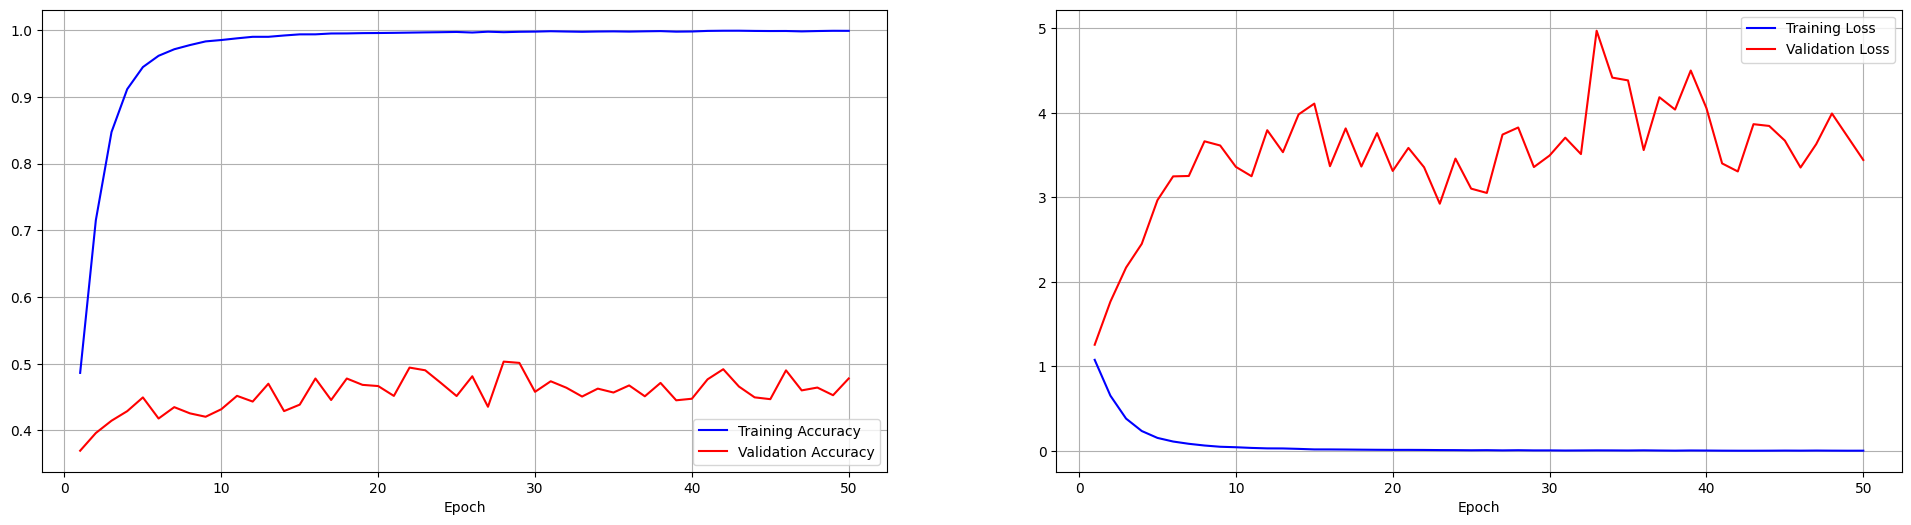

Best Test Accuracy Score 0.50320, is for epoch 28


In [20]:
plot_results(history)
best_epoch =get_best_epcoh(history)

In [21]:
validation_generator = datagen_validation.flow_from_directory(base_path + "Dataset_Validation_Extracted",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
# Evaluate the model on the test data
loss, accuracy = model.evaluate(validation_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

Found 4801 images belonging to 3 classes.
38/38 [==============================] - 10s 264ms/step - loss: 4.9243 - accuracy: 0.4249
Test loss: 4.924344062805176
Test accuracy: 0.4249114692211151
